# Aula 7 - Árvores de decisão

![](img/decision_tree.png)


## 7.1 O pacote scikit-learn
Usaremos o pacote `scikit-learn` (https://scikit-learn.org/stable/) para mineração de dados.
Para instalar o pacote use:

`>> pip install -U scikit-learn`

As pastas do scikit-learn são organizadas de forma diferente do `pandas` e `numpy`, por exemplo, de forma que faremos a importação especifica do que precisarmos usando a sintaxe `from`. Considere que vamos usar o método `tree`, usaremos a importação:

`from sklearn import tree`

## 7.2 Importando a base de vinhos
Usaremos a base wine.data para esse estudo. A base contém informações a respeito de 3 vinhos diferentes (colunas de 1 a 13), sendo que a coluna é a classificação do vinho (1,2 ou 3). Os atributos são os seguintes (todos numéricos):

1.  Alcohol
2.  Malic acid
3.  Ash
4.  Alcalinity of ash
5.  Magnesium
6.  Total phenols
7.  Flavanoids
8.  Nonflavanoid phenols
9.  Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

Mais informaçoes sobre os dados estão disponíveis em (https://archive.ics.uci.edu/ml/datasets/wine):

In [2]:
import numpy as np
import pandas as pd

#Lendo a base de dados : o primeiro valor é a classe do vinho (1,2 ou 3), os outros são as caracteristicas
dt = pd.read_csv(r"G:\Meu Drive\Arquivos\UFPR\1 - Disciplinas\2 - Intro  Mineração de Dados\5-Python\Datasets\wine.data", sep = ",", header = None)
dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## 7.3 Ajustando uma árvore
Para fazer o ajuste usando as árvores de decisão, precisamos ter um conjunto com os atributos, sendo um array-like (matriz em que cada registro é uma linha, com n-colunas de atributos), e o vetor
das classes, que deve ter o mesmo número de elementos que as linhas das observações. Por isso usamos o `pandas` para separar os dados em X(atributos) e Y(classes). Para estimarmos um modelo de árvore, basta instanciarmos um classificador com `DecisionTreeClassifier()` e usar o método `fit`, passando X e Y como argumentos:

In [3]:
#Devido a estrutura do pacote, não podemos importar dessa forma, temos que importar os recursos individualmente
#import sklearn as sk 

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn import tree


X = dt.iloc[:,1:]
Y = dt.iloc[:,0]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

## 7.4 Visualizando
Podemos exportar a árvore em formato de texto e imagem.

In [4]:
# Exportando a arvore como texto
texto = tree.export_text(clf)
print(texto)

|--- feature_12 <= 755.00
|   |--- feature_11 <= 2.11
|   |   |--- feature_10 <= 0.94
|   |   |   |--- feature_6 <= 1.58
|   |   |   |   |--- class: 3
|   |   |   |--- feature_6 >  1.58
|   |   |   |   |--- class: 2
|   |   |--- feature_10 >  0.94
|   |   |   |--- feature_1 <= 2.39
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  2.39
|   |   |   |   |--- class: 3
|   |--- feature_11 >  2.11
|   |   |--- feature_6 <= 0.80
|   |   |   |--- class: 3
|   |   |--- feature_6 >  0.80
|   |   |   |--- feature_0 <= 13.17
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  13.17
|   |   |   |   |--- feature_0 <= 13.36
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  13.36
|   |   |   |   |   |--- class: 2
|--- feature_12 >  755.00
|   |--- feature_6 <= 2.17
|   |   |--- feature_10 <= 0.80
|   |   |   |--- class: 3
|   |   |--- feature_10 >  0.80
|   |   |   |--- class: 2
|   |--- feature_6 >  2.17
|   |   |--- feature_9 <= 3.43
|   |   |   |--- class: 2
|  

Para exportarmos a árvore de forma visual, é necessário ter o pacote `matplotlib` instalado. O código abaixo também exporta a árvore em formato pdf.

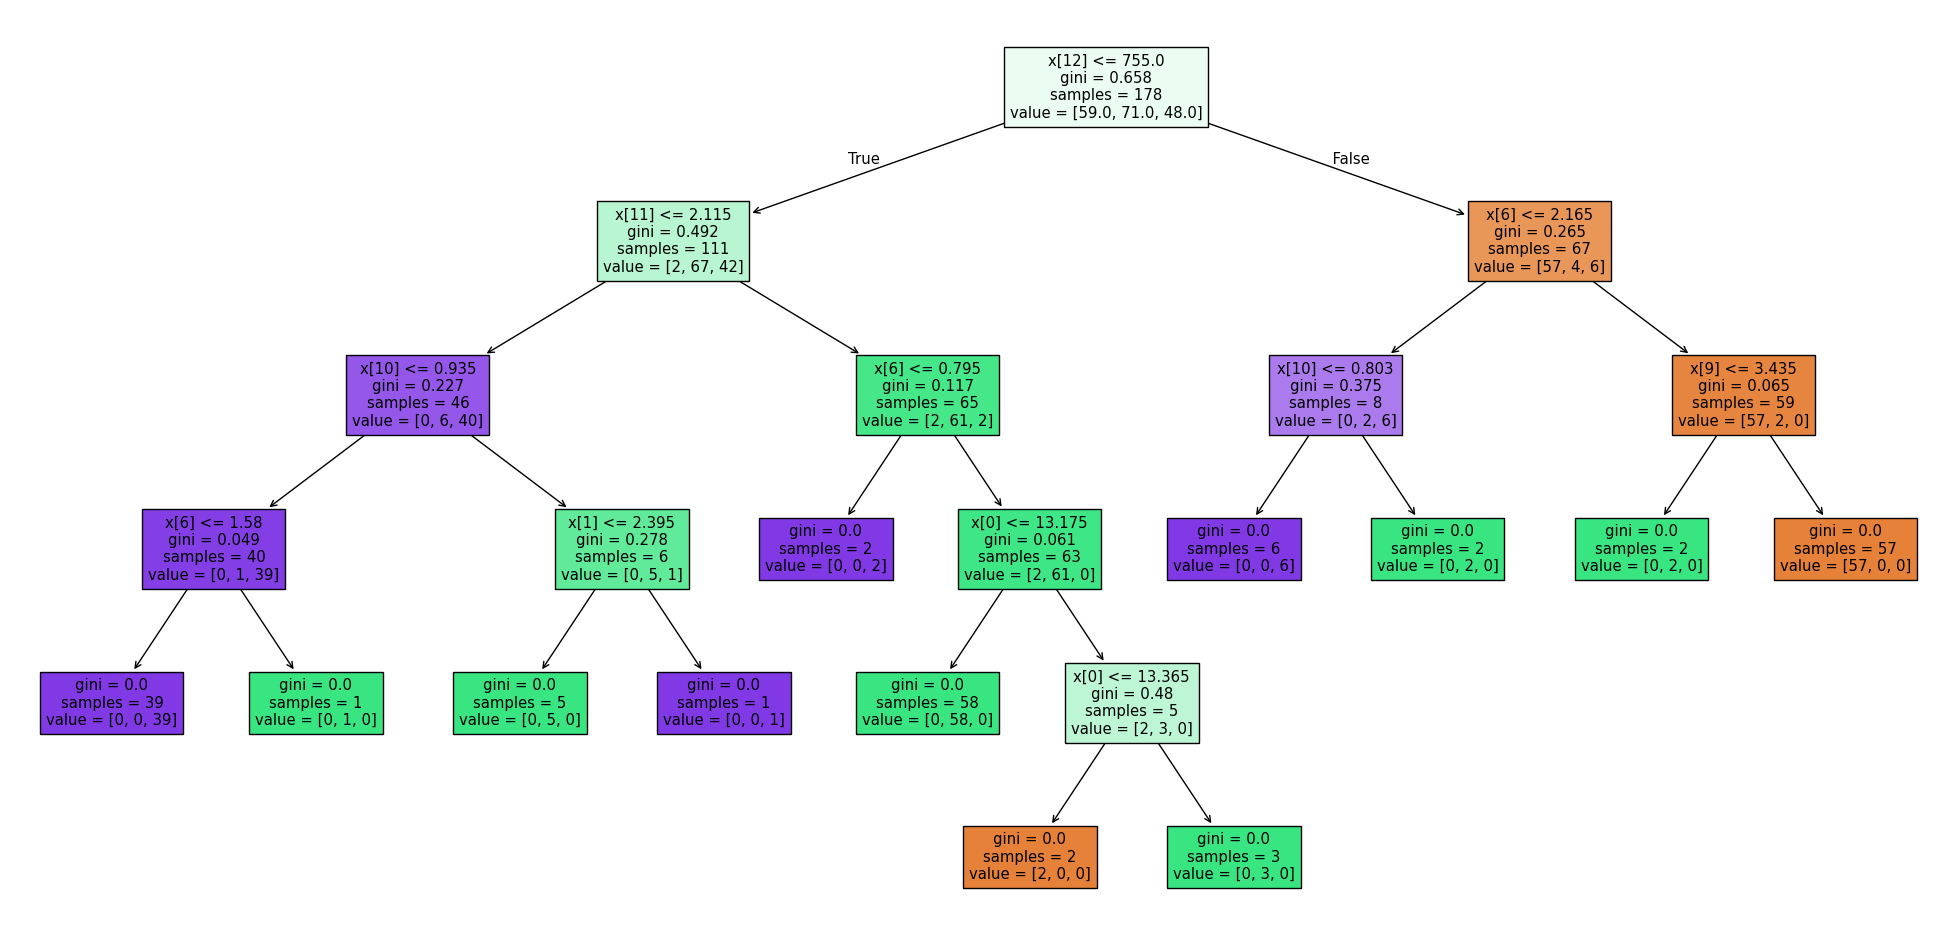

In [5]:
# Exportando visualmente (precisa do matplotlib)
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(25,12) 
im = tree.plot_tree(clf, filled = True)
fig.savefig("arvore2.pdf")

## 7.5 Como interpretar a árvore
Considere a seguinte imagem:

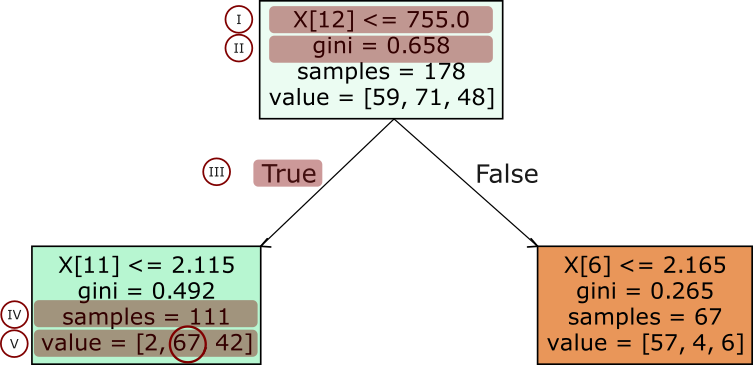

**I - X[12] <= 755.0**: Essa é a condição do nó, ou seja, se o atributo X[12] (como não passamos uma lista de nomes ele indica como elemento do vetor), for menor ou igual a 755.0

**II - gini=0.658**: A medição *gini* se refere a pureza de um nó. Quanto mais baixo o valor gini, menos heterogeneidade existe nas separações das classes (mostrada em value). Um nó com valor de gini = 0 implica que toda a amostra está somente em uma classe.

**III - True**: Indica o caminho da condição, ou seja, se X[12] <= 755.0, siga para a esquerda, senão para a direita.

**IV - Samples = 111**: Indica o número de elementos da amostra que estão separados no nó. Considerando o primeiro nó, temos que samples = 178, o que é a conjunto total. Seguindo o caminho True, ou seja, se X[12] <= 755.0 a amostra cai para 111.

**V - Value = [2,67,42]**: Esse número indica o número de elementos (da amostra do nó), em cada classe. Ou seja, considerando uma separação dos dados somente pela condição X[12] <= 755.0, a amostra fica com 111 elementos, e destas 2 são da classe 1, 67 da classe 2 e 42 da classe 3. Se quisessemos usar somente essa regra para realizar a classificação, usariamos a classe com a maior das frequências de values, ou seja, usando somente a regra X[12] <= 755.0, o classificador considera que estamos falando do vinho do tipo 2 (devido ao 67).

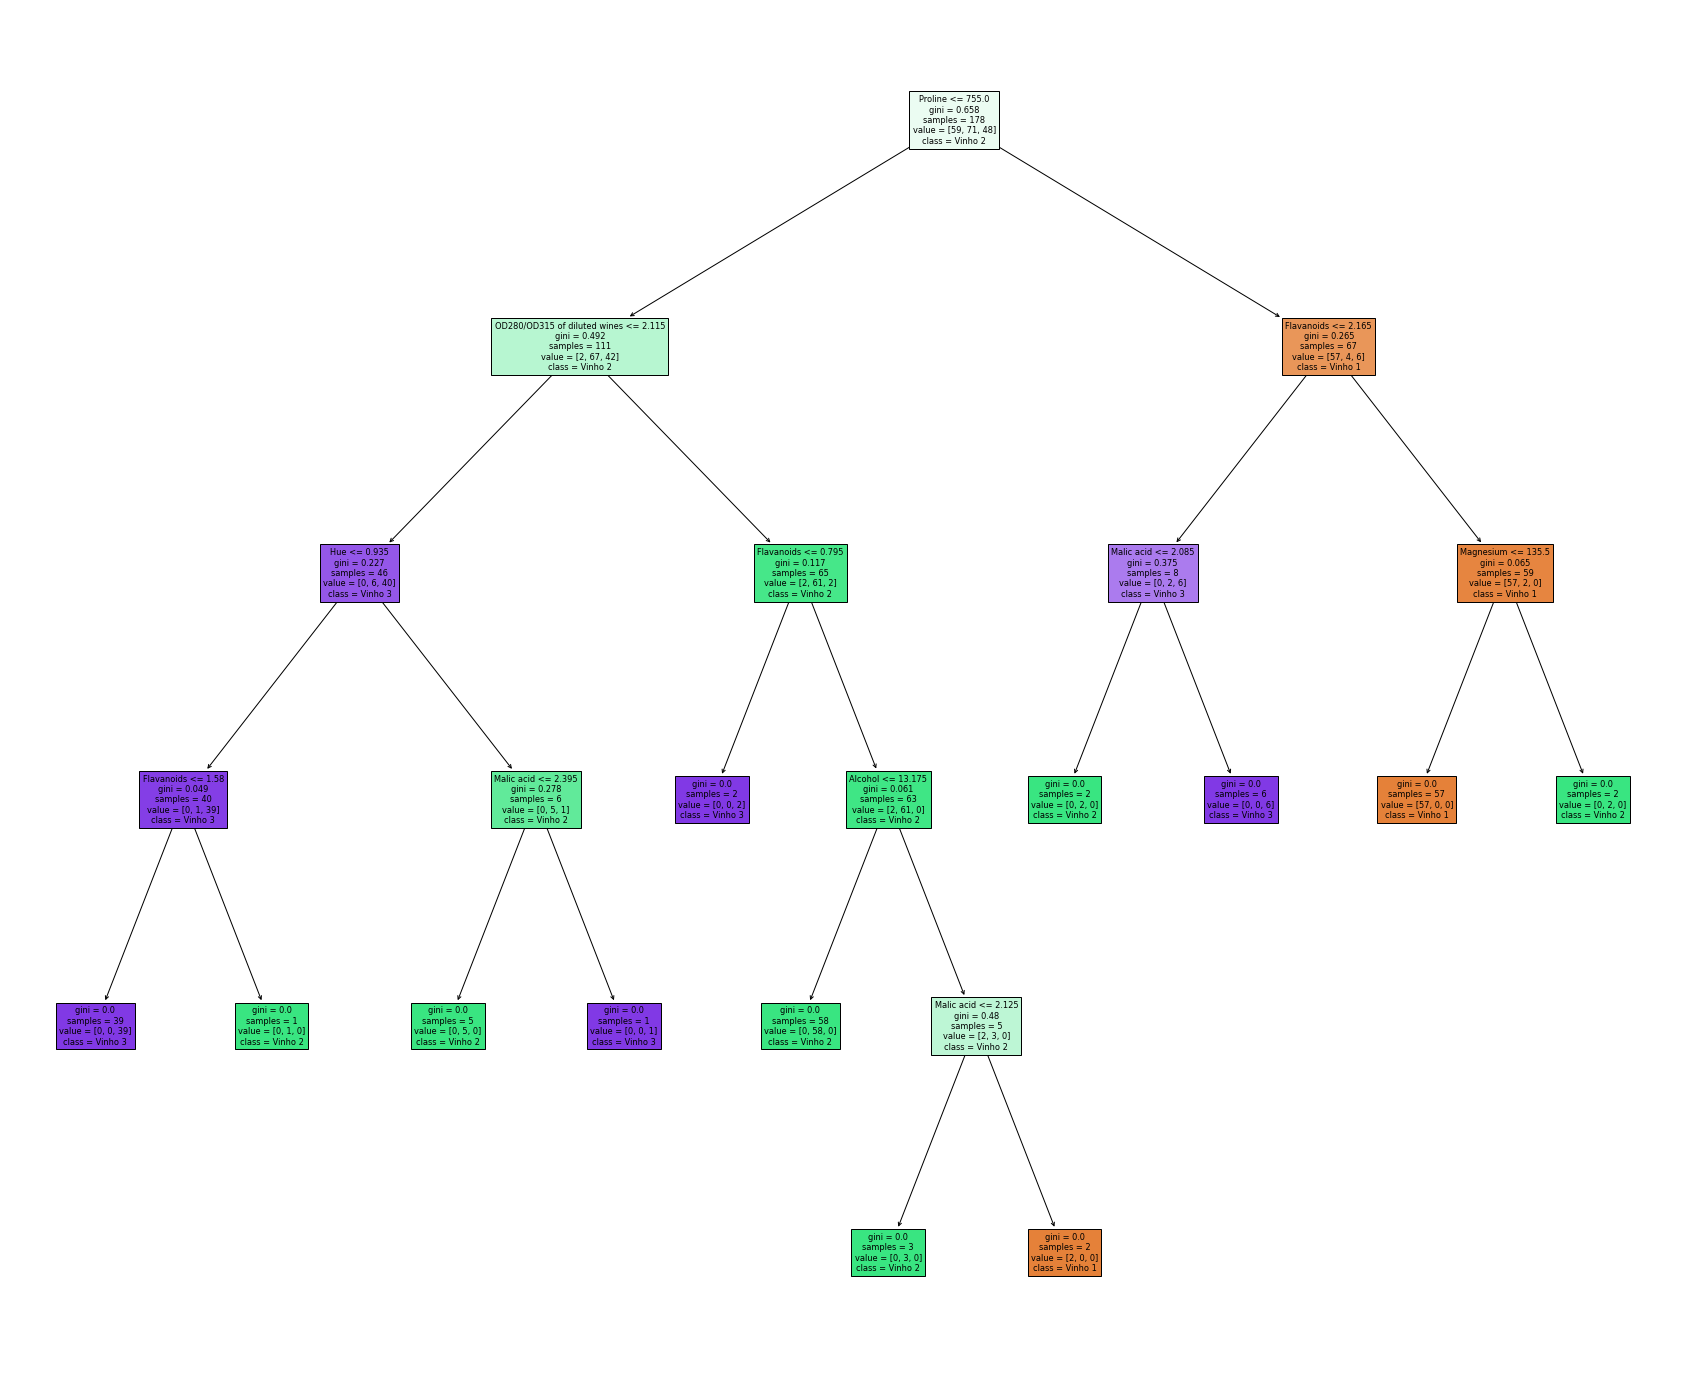

In [10]:
# Podemos passar uma lista com o nome dos atributos e das classes ao se plotar a árvore (https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html):

v_nomes = ["Vinho 1","Vinho 2","Vinho 3"]
v_atrib = ["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins",
           "Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]

fig = plt.figure()
fig.set_size_inches(30,25) 
im = tree.plot_tree(clf, filled = True, class_names = v_nomes, feature_names = v_atrib)
fig.savefig("arvore.pdf")

In [6]:
# Também é possível determinar o criterio de separação a ser usado (o default é o gini)
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X, Y)

## 7.6 Usando o modelo para classificação
Uma vez ajustado, podemos usar o modelo para classificar novos registros usando a função `predict`, bastando passar um array-like (matriz). O retorno é um array com uma classificação para cada linhas dos dados de entrada.

In [7]:
# Considere o conjunto de atributos (como uma matriz: linhas = numero de instancias a classificar, colunas = atributos):
novo_vinho = [[14,2,2,14.56,120,2.08,3,0.25,3,5.5,1,4,1048]]
classe_novo_vinho = clf.predict(novo_vinho)

# O resultado é um array com o tamanho das linhas da matriz de previsão, com os elementos classificados:
print("Classe novo vinho : ",classe_novo_vinho)

# Se passarmos 2 valores a serem classificados:
novos_vinhos = [[14,2,2,14.56,120,2.08,3,0.25,3,5.5,1,4,1048],
               [14,2,2,14.56,120,2.08,0.8,0.25,3,2,1,4,600]]
classe_novos_vinhos = clf.predict(novos_vinhos)
print("Classe dois novos vinhos : ",classe_novos_vinhos)

Classe novo vinho :  [1]
Classe dois novos vinhos :  [1 2]


## 7.8 Separação dos dados
Quando fazemos a estimação de um modelo, usamos uma parte dos dados para a estimação, e outra parte para os testes. Existem diversas formas de se realizar essa separaçai, como o método *holdout* e o *cross-validation*
### 7.8.1 Método *Holdout*
Separar os dados em duas partes: uma de treinamento e testes, com uma definição da porcentagem de quantos registros devem estar em cada uma. O método *holdout* é exemplificado pela figura abaixo:


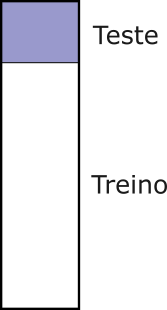

Gerar o modelo a partir dos dados de treinamento para em seguida usar o conjunto de testes para aferir a sua acurácia. Para isso usamos o método `train_test_split` de `sklearn.cross_validation` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split). Nesse caso passamos os arrays X e Y, o tamanho do teste. `random_state` serve para reproducibilidade dos resultados, enquanto `stratify = Y` faz uma amostragem estratificada, tentando balancear as classes presentes no conjunto de treino e de testes.

In [8]:
# EXEMPLO USANDO HOLDOUT
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada

from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify = Y)

print("Elementos no treino : ", X_treino.shape[0])
print("Elementos no teste : ", X_teste.shape[0])

# Declara o classificador
clf = tree.DecisionTreeClassifier(random_state = 1) #usando o random state para replicabilidade dos resultados
clf.fit(X_treino, Y_treino)

predicted = clf.predict(X_teste)
print(predicted)

Elementos no treino :  124
Elementos no teste :  54
[1 1 1 1 2 3 2 3 1 3 1 2 3 1 3 3 1 2 3 2 1 3 2 1 1 2 1 3 1 2 1 3 1 2 2 1 3
 1 1 3 3 2 2 2 1 2 2 3 2 3 2 2 1 1]


### 7.8.2 Método *cross-validation (k-fold)*
O método *cross-validation* separa os dados em k subconjuntos e treina k modelos, cada vez usando uma k-1 partes para o treino e 1 para os testes, de forma que ao fim, todos os dados são usados para estimar e para testar o modelo. Uma divisão em k = 5 partes pode ser vista na figura abaixo:

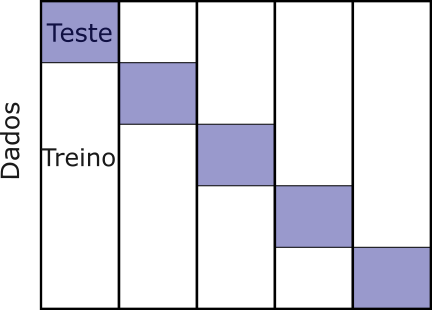

A eficácia do modelo é medida pelo erro médio de todos os modelos (veja os erros na próxima Seção). Dessa forma, o *k-fold* **não é usado para estimar e usar o modelo**, mas sim para verificar a acurácia de um modelo (ou mesmo comparar a forma de geração de vários modelos). 
Diferentemente de quando calculamos o holdout, que primeiro separamos os dados para somente em seguida treinar, testar e coletar a eficacia (erros) do modelo, quando usamos o k-fold **todas essas etapas são feitas de uma só vez.** Existem dois métodos que podemos usar em Python para calcular o k-fold, o `cross_val_score` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) ou o `cross_validate` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), ambos importados de `sklearn.model_selection`. A diferença entre os dois é que o `cross_val_score` calcula a eficácia (erros) para cada fold em relação ao conjunto de *testes*, já com o *cross_val_score* podemos optar por coletar também o erro dos treino (usamos os dois erros para avaliar os modelos). Abaixo é mostrado um exemplo para cada método.
### 7.8.2.1 Usando `cross_val_score`  (retorna eficácia de testes)
Por esse motivo a saída dó método é um conjunto de erros (um para cada k).Para isso usamos a função  `cross_val_score` importada de `sklearn.model_selection`. Podemos escolher qual tipo de medida queremos que ele calcule com o argumento `scoring`, sendo elas:

1. ‘accuracy’
2. ‘balanced_accuracy’
3. ‘roc_auc’
4. ‘f1’
5. ‘neg_mean_absolute_error’
6. ‘neg_root_mean_squared_error’
7. ‘r2’

Usaremos a `accuracy`, que diz respeito a porcentagem de instancias classificadas de forma correta com o modelo.

In [9]:
from sklearn.model_selection import cross_val_score
cl_cross = tree.DecisionTreeClassifier(criterion = 'entropy')
folds    = 10
scores   = cross_val_score(cl_cross, X, Y, cv = 5, scoring='accuracy')
print("Acuracia : ", scores)
print("Acurácia média : ", scores.mean())

Acuracia :  [0.91666667 0.83333333 0.94444444 0.97142857 0.88571429]
Acurácia média :  0.9103174603174604


### 7.8.2.1 Usando `cross_validate` (retorna eficácia de testes + treino)
O retorno do método é um dicionário, se passamos o argumento `return_train_score = True` um array com a eficácia em cada conjunto de treino também é retornada.

In [10]:
from sklearn.model_selection import cross_validate
cl_cross_validate = tree.DecisionTreeClassifier(criterion = 'entropy')
folds = 10
cv_results = cross_validate(cl_cross_validate, X, Y, cv = 3, return_train_score = True)
cv_results

{'fit_time': array([0.00081515, 0.        , 0.00500059]),
 'score_time': array([0.        , 0.01534843, 0.00396228]),
 'test_score': array([0.81666667, 0.83050847, 0.98305085]),
 'train_score': array([1., 1., 1.])}

Podemos então usar a média tanto do dos valores de test_score quanto de train_score para verificarmos se o modelo está com overfitting.

In [11]:
eficacia_media_teste  = cv_results["test_score"].mean()
eficacia_media_treino = cv_results["train_score"].mean()
print("Efic. de treino : {:.2f}\nEfic. de teste: {:.2f}".format(eficacia_media_teste, eficacia_media_treino))

Efic. de treino : 0.88
Efic. de teste: 1.00


## 7.9  Avaliando o desempenho do modelo

Os erros cometidos por um modelo de classificação são geralmente divididos em dois grupos: *erro de treinamento* e *erro de generalização (ou testes)*. Erros de treinamento se referem aos erros de classificação equivocada do modelo cometido no registro de treinamento, enquanto os erros de generalização são os erros do modelo em registros não vistos anteriormente.

Um bom modelo deve ter baixa quantidade de erros de treinamento assim como de erros de generalização. Isso é importante, pois um modelo com baixo erro de treinamento pode muito bem possuir um alto erro de testes. Isso é conhecido como *overfitting* (o modelo está muito ajustado aos dados de treino, e não generaliza bem para instâncias não vistas).

### 7.9.1 Erro de treinamento

Podemos aferir o erro de treinamento pelo próprio modelo, usando o método `score`. Ele mede a acurácia do modelo, ou seja, a porcentagem de classificações corretas.

Elementos no treino :  124
Elementos no teste :  54
1.0


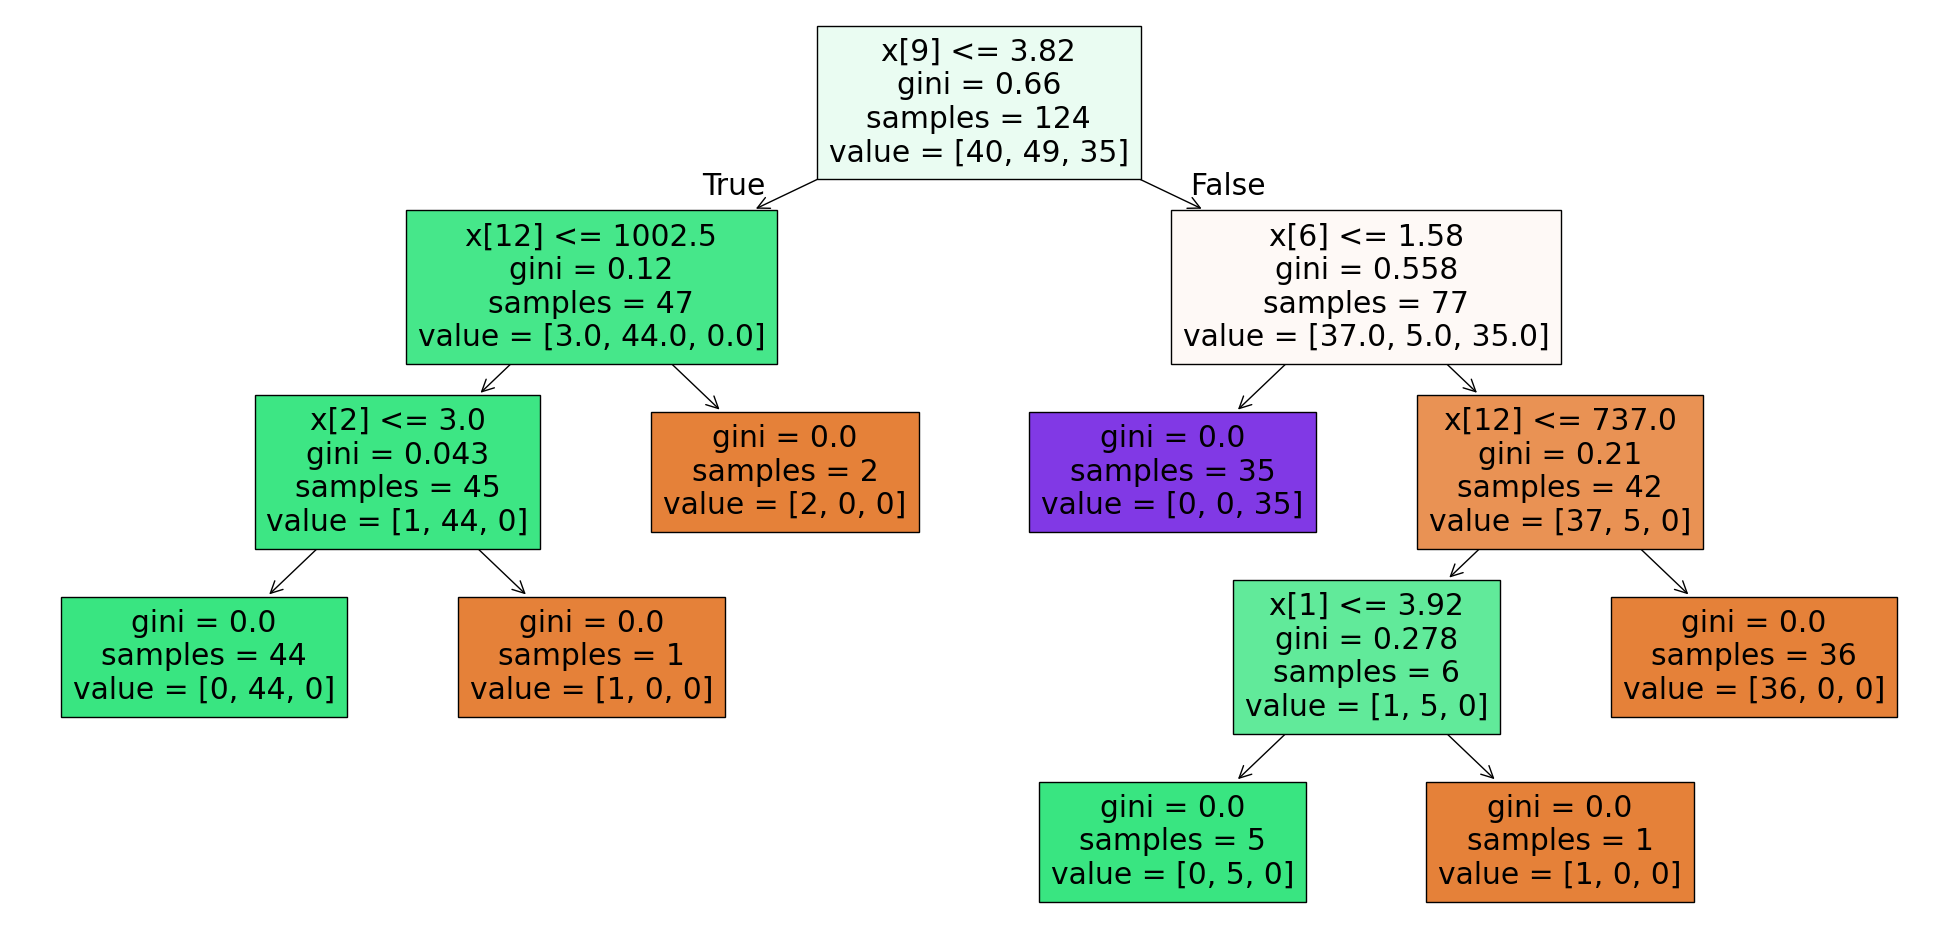

In [12]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 0)

print("Elementos no treino : ", X_treino.shape[0])
print("Elementos no teste : ", X_teste.shape[0])

# Declara o classificador
clf = tree.DecisionTreeClassifier(random_state = 0)
clf.fit(X_treino, Y_treino)

print(clf.score(X_treino, Y_treino))
fig = plt.figure()
fig.set_size_inches(25,12) 
im = tree.plot_tree(clf, filled = True)


### 7.9.2 Erro de generalização (de testes)
Usando o mesmo método `score`, porém com o conjunto de testes, temos a porcentagem de classes corretamente classificadas. Um bom modelo deve ter um score "equiparável", considerando o erro de testes e de treino.

In [13]:
print(clf.score(X_teste, Y_teste))

0.9444444444444444


OBS: Note que ao se alterar o parâmetro `test_size` do split, também se alteram os valores de acurácia. Por esse motivo a validação k-fold é mais confiável ao se escolher um modelo. O código abaixo estima um modelo com alguns parâmetros e calcula o erro de generalização usando holdout comum e k-fold:

In [14]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size  = 0.4, random_state = 42)
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
# Ajustando o modelo
model.fit(X_treino, Y_treino)

# Calculando o score por holdout
score_holdout = model.score(X_teste, Y_teste)

# Calculando por k-fold, k = 10
cl_cross = tree.DecisionTreeClassifier(criterion='entropy', random_state = 42)
scores_k_fold = cross_val_score(cl_cross, X, Y, cv = 10, scoring = 'accuracy')


print("Acuracia holdout: ", score_holdout)
print("Acurácia média k-fold: ", scores_k_fold.mean())


Acuracia holdout:  0.8472222222222222
Acurácia média k-fold:  0.9153594771241831


### Exemplo "toy" para o cálculo do score (treino e testes)

Acurácia do treino: 0.8
Acurácia do testes: 1.0


array([0, 0, 1, 1, 1])

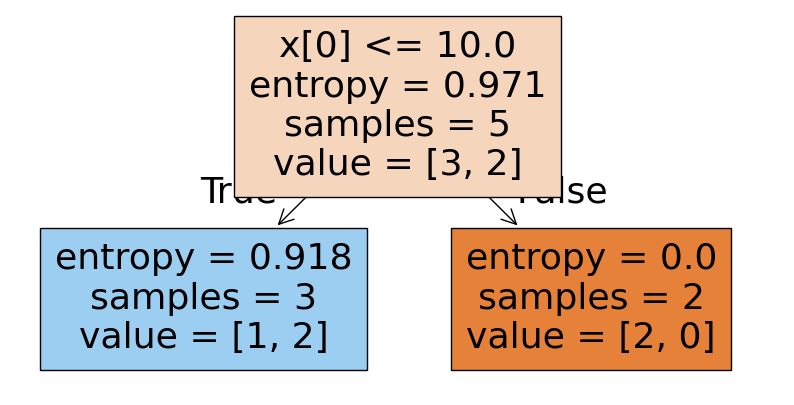

In [15]:
X_treino = [[17,1,2], [15,1,2], [5,1,2],[5,1,2],[5,1,2]]
Y_treino = [0,0,1,1,0]

X_testes = [[17,1,2], [15,1,2], [5,1,2],[5,1,2]]
Y_testes = [0,0,1,1]

mod_pred = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
mod_pred.fit(X_treino, Y_treino)

fig = plt.figure()
fig.set_size_inches(10,5) 
fig = tree.plot_tree(mod_pred, filled = True)

# Portanto existe erro:
print("Acurácia do treino:",mod_pred.score(X_treino, Y_treino))
print("Acurácia do testes:",mod_pred.score(X_testes, Y_testes))

mod_pred.predict(X_treino)

### 7.9.3  Matriz de confusão
A matriz de confusão permite analisar em quais locais o modelo está errando mais (ou acertando mais). Isso é usado para dados desbalanceados, ou em que uma classe tem uma importância maior do que a outra.
Passando um vetor com as classes ocorridas e outro com as estimadas pelo modelo, podemos calcular a matriz de confusão.

In [16]:
from sklearn.metrics import confusion_matrix

# Sejam os vetores v_ocorrido e v_previsto os tipos de vinhos e as classificações que o modelo fez:
v_ocorrido = [1,2,3,3,2,2,1,3]
v_previsto = [1,2,1,1,3,2,3,3]
confusion_matrix(v_ocorrido, v_previsto)

array([[1, 0, 1],
       [0, 2, 1],
       [2, 0, 1]], dtype=int64)

In [17]:
# Podemos também passar uma lista com a ordem das classes na matriz:
v_ocorrido = [1,2,3,3,2,2,1,3]
v_previsto = [1,2,1,1,3,2,3,3]
confusion_matrix(v_ocorrido, v_previsto, labels = [1,2,3])

array([[1, 0, 1],
       [0, 2, 1],
       [2, 0, 1]], dtype=int64)

De forma geral então, para calcular a matriz de confusão precisamos:
1. Ajustar o modelo.
2. Realizar as previsões (geralmente para os testes).
3. Aplicar a matriz no conjunto de previsões e no ocorrido.

O código abaixo faz isso, usando *holdout* com 30% de testes.

In [18]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 1)
cl = tree.DecisionTreeClassifier(random_state = 1)
cl.fit(X_treino, Y_treino)
predicao = cl.predict(X_teste)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_teste, predicao)

array([[22,  1,  0],
       [ 1, 17,  1],
       [ 0,  0, 12]], dtype=int64)

### 7.10 Otimização e ajuste de parâmetros (*hyperparameter optimization*)
Vimos como calcular o desempenho de uma árvore de decisão, e como o desempenho é afetado pelos parâmetros escolhidos. Dessa forma surge a pergunta: existe um conjunto de parâmetros capaz de gerar uma árvore melhor do que outra? A resposta é sim. Considere alguns parâmetros possível para o `DecisionTreeClassifier`:

1. **criterion{“gini”, “entropy”, “log_loss”}, default=”gini”**: Método que define a qualidade da separação dos nós.
2. **splitter{“best”, “random”}, default=”best”**: Método usado para realizar a separação dos nós.
3. **max_depth:int, default=None**: profundidade máxima da árvore.
4. **min_samples_split:int or float, default=2**: Número mínimo de amostras necessária para se expandir um nó.
5. **min_samples_leaf:int or float, default=1**: Numero mínimo de amostras em um nó. Um ponto de separação será considerado, somente se deixar `min_samples_leaf` em cada lado da separação.

Uma forma para tentarmos otimizar o modelo seria a seguinte:
1. Atualizar parâmetros
2. Ajustar modelo
3. Calcular desempenho
4. Guardar melhores parãmetros até o momento
5. Voltar a 1 se critério de parada não for atingido

Vamos criar um código que faça isso. Primeiro criaremos uma função que recebe os dados X e Y e os parâmetros, e retorna a acurácia do conjunto de treino e a média das acurácias do conjunto de testes pelo método k-fold com k=5:

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import tree

def calcula_z(X, Y, criterio):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 1)
    cl = tree.DecisionTreeClassifier(random_state = 1, criterion = criterio)
    cl.fit(X_treino, Y_treino)
    score_treino  = cl.score(X_treino, Y_treino)
    scores_k_fold = cross_val_score(cl, X, Y, cv = 5, scoring = 'accuracy')
    return (score_treino, scores_k_fold.mean())
    

scores = calcula_z(X,Y, "gini")
print(scores)

(1.0, 0.8876190476190476)


Note que deixamos um argumento na função referente ao critério de cálculo da qualidade dos nós. Podemos então criar uma lista com os 3 valores possíveis [“gini”, “entropy”, “log_loss”] e verificar qual gera melhores resultados:

In [20]:
crit = ["gini", "entropy", "log_loss"]

for c in crit:
    score = calcula_z(X,Y,c)
    print(score)

(1.0, 0.8876190476190476)
(1.0, 0.8934920634920633)
(1.0, 0.8934920634920633)


Ainda, podemos alterar a função para receber o parâmetro de max_depth:

In [21]:
def calcula_z2(X, Y, criterio, n_depth):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 1)
    cl = tree.DecisionTreeClassifier(random_state = 1, criterion = criterio, max_depth = n_depth)
    cl.fit(X_treino, Y_treino)
    score_treino  = cl.score(X_treino, Y_treino)
    scores_k_fold = cross_val_score(cl, X, Y, cv = 5, scoring = 'accuracy')
    return (score_treino, scores_k_fold.mean())

crit     = ["gini", "entropy", "log_loss"]
max_prof = [1,2,3,4]

for c in crit:
    for n in max_prof:
        score = calcula_z2(X,Y,c,n)
        print(score)

(0.6612903225806451, 0.6463492063492063)
(0.9193548387096774, 0.8261904761904761)
(0.9838709677419355, 0.8820634920634921)
(0.9919354838709677, 0.916031746031746)
(0.6209677419354839, 0.562063492063492)
(0.967741935483871, 0.910952380952381)
(0.9919354838709677, 0.9046031746031747)
(1.0, 0.8934920634920633)
(0.6209677419354839, 0.562063492063492)
(0.967741935483871, 0.910952380952381)
(0.9919354838709677, 0.9046031746031747)
(1.0, 0.8934920634920633)


E dessa forma podemos criar o algoritmo para otimizar os parâmetros da árvore de decisão.

## 7.11 Dados não balanceados
Considere o banco de dados *WineQT.csv*, que afere a qualidade de vinhos por uma nota (de 1 a 10), com base em um conjunto de atributos do vinho. As notas 3,4 e 8 são muito menos frequêntes do que as outras.

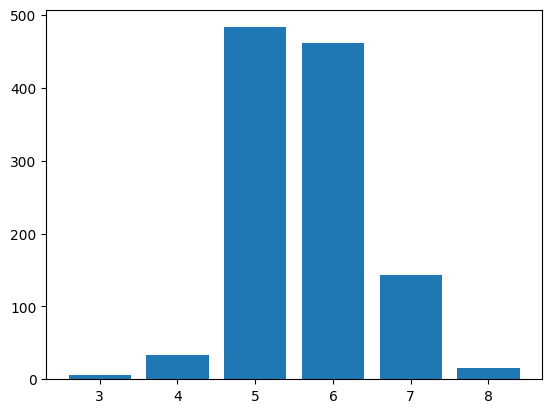

In [23]:
dt_im = pd.read_csv(r"G:\Meu Drive\Arquivos\UFPR\1 - Disciplinas\2 - Intro  Mineração de Dados\5-Python\Datasets\WineQT.csv")
dt_im

dt_grouped = dt_im.groupby("quality").count()

fig, ax = plt.subplots(1,1)
ax.bar(dt_grouped.index, dt_grouped["Id"])
plt.show()

In [28]:
dt_grouped

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,6,6,6,6,6,6,6,6,6,6,6,6
4,33,33,33,33,33,33,33,33,33,33,33,33
5,483,483,483,483,483,483,483,483,483,483,483,483
6,462,462,462,462,462,462,462,462,462,462,462,462
7,143,143,143,143,143,143,143,143,143,143,143,143
8,16,16,16,16,16,16,16,16,16,16,16,16


Estimando um modelo de classificação, sem limitar os parâmetros:

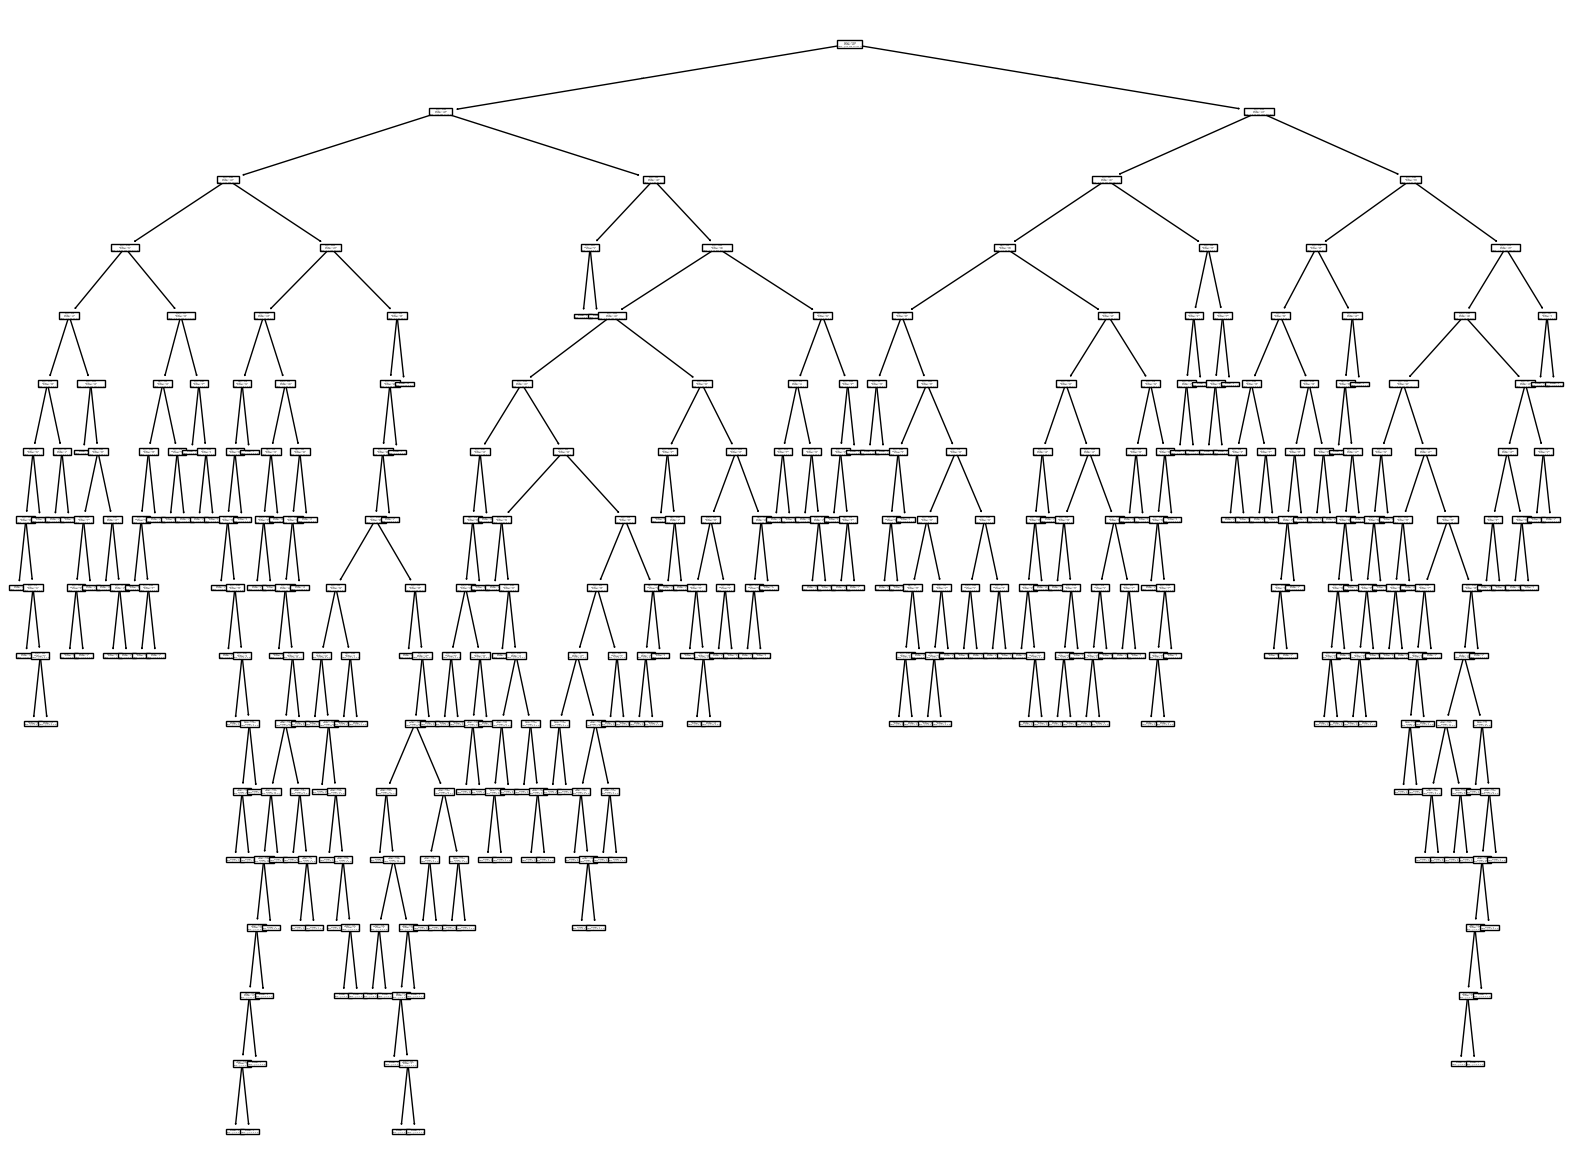

In [24]:
## demora para rodar mesmo, até estimar ##

# Gerando um modelo da forma normal
X = dt_im.iloc[:,0:11]
Y = dt_im.iloc[:,11]


# Criando um conjunto de treino/testes - holdout 0.3
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)
clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 1)
clf.fit(x_treino, y_treino)

fig = plt.figure()
fig.set_size_inches(20,15)
fig = tree.plot_tree(clf)

plt.show()


In [25]:
# Verificando o score e a matriz de confusão para os dados de teste:
score = clf.score(x_teste, y_teste)
print("Score : ", score)
v_pred = clf.predict(x_teste)
v_pred

confusion_matrix(y_teste, v_pred)

Score :  0.5422740524781341


array([[ 0,  0,  0,  2,  0,  0],
       [ 0,  2,  7,  1,  0,  0],
       [ 0,  3, 95, 45,  2,  0],
       [ 1,  5, 55, 62, 10,  5],
       [ 0,  0,  5, 10, 26,  2],
       [ 0,  0,  1,  1,  2,  1]], dtype=int64)

Podemos alterar os parâmetros para tentar deixar o modelo mais generalizado.

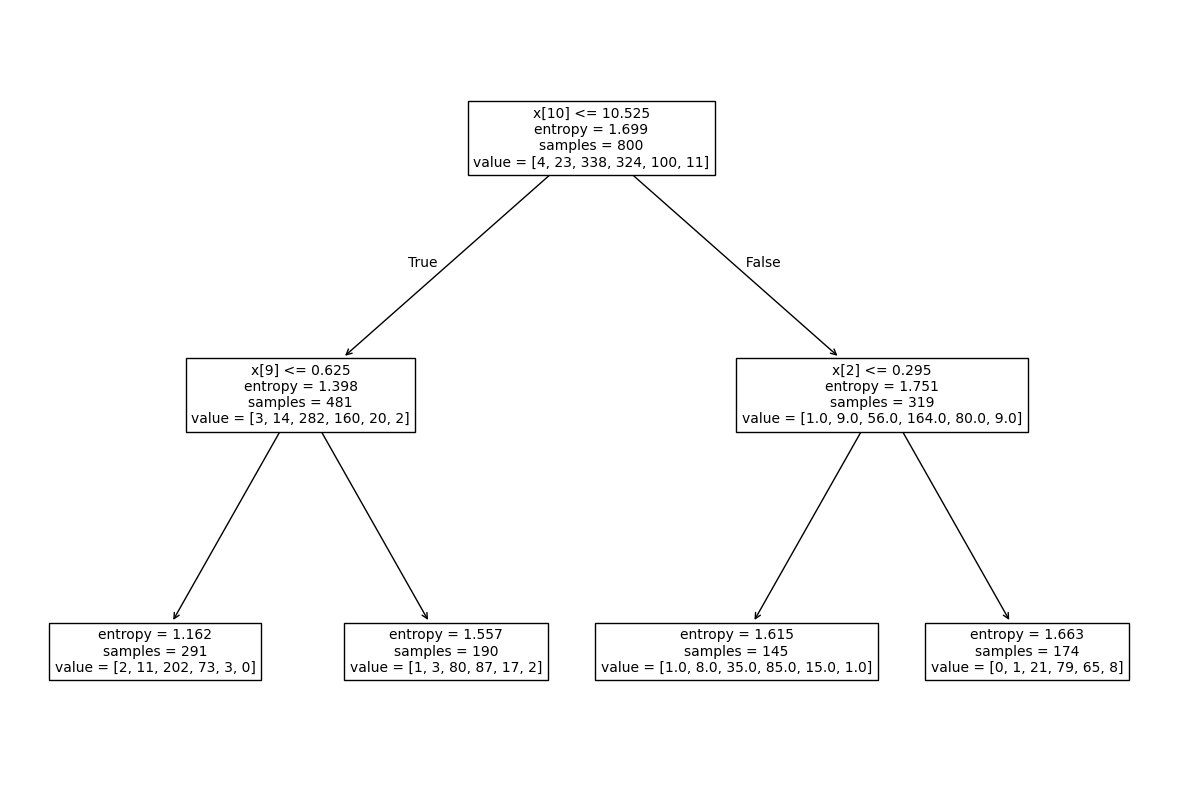

Score :  0.5626822157434402


array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   4,   6,   0,   0],
       [  0,   0,  91,  54,   0,   0],
       [  0,   0,  36, 102,   0,   0],
       [  0,   0,   1,  42,   0,   0],
       [  0,   0,   0,   5,   0,   0]], dtype=int64)

In [26]:
# Podemos alterar os parâmetros da árvore para tentar deixar ela mais genéria (podar)

# Criando um conjunto de treino/testes - holdout 0.3
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)
clf = tree.DecisionTreeClassifier(max_depth = 2, criterion = "entropy", random_state = 1)
clf.fit(x_treino, y_treino)

fig = plt.figure()
fig.set_size_inches(15,10)
fig = tree.plot_tree(clf)

plt.show()


# Verificando o score e a matriz de confusão para os dados de teste:
score = clf.score(x_teste, y_teste)
print("Score : ", score)
v_pred = clf.predict(x_teste)
v_pred

confusion_matrix(y_teste, v_pred)


E se os vinhos com as notas 3 e 8 fossem os mais importantes na correta classificação, pois eles são de alguma forma venenosos? Pela classificação acima (na matriz de confusão), nenhum dos dois foi corretamente classificado. Isso pode ser causa do não-balanceamento dos dados. Podemos tentar corrigir isso estimando um modelo com o argumento `class_weight` como "balanced", de forma que um peso é dado a cada classe, inversamente proporcional à sua frequência relativa no banco.

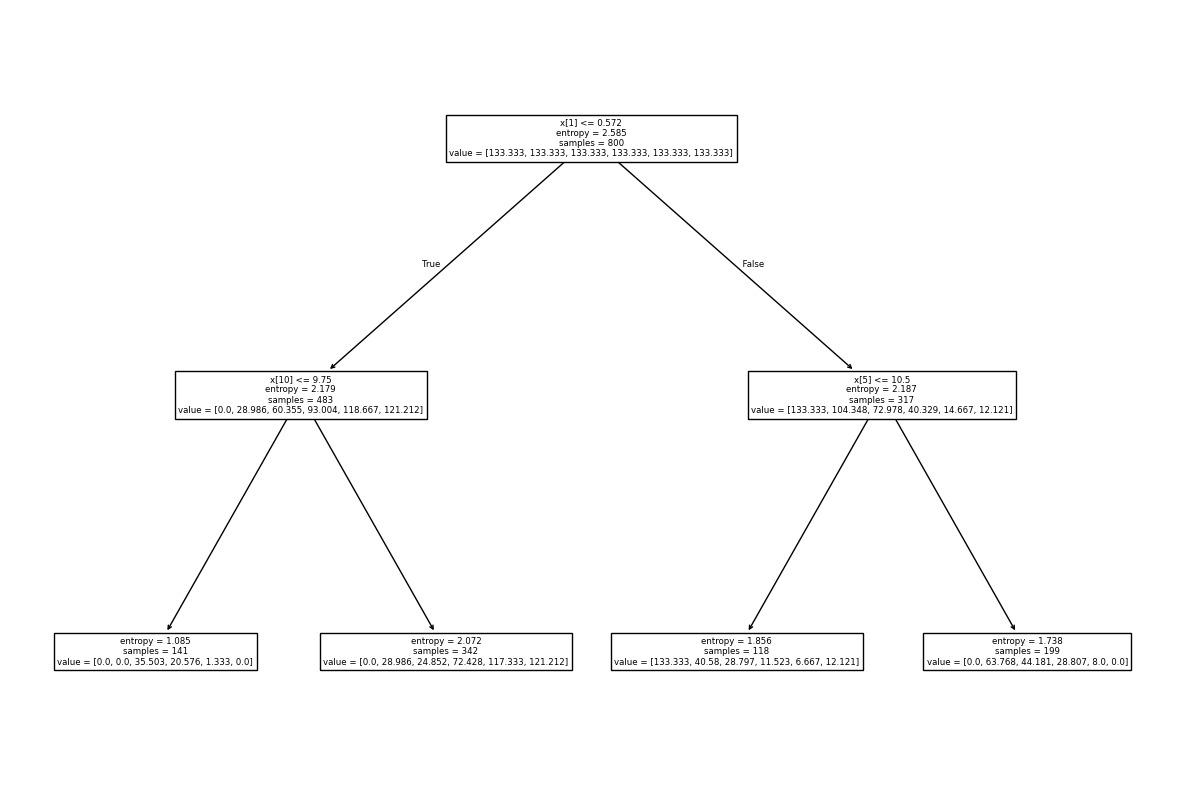

Score :  0.14868804664723032


array([[ 1,  1,  0,  0,  0,  0],
       [ 1,  3,  4,  0,  0,  2],
       [22, 56, 43,  0,  0, 24],
       [23, 27, 20,  0,  0, 68],
       [ 1,  6,  2,  0,  0, 34],
       [ 0,  1,  0,  0,  0,  4]], dtype=int64)

In [28]:
# Criando um conjunto de treino/testes - holdout 0.3
clf = tree.DecisionTreeClassifier(max_depth = 2, criterion = "entropy", random_state = 1, class_weight = "balanced")
clf.fit(x_treino, y_treino)

fig = plt.figure()
fig.set_size_inches(15,10)
fig = tree.plot_tree(clf)

plt.show()


# Verificando o score e a matriz de confusão para os dados de teste:
score = clf.score(x_teste, y_teste)
print("Score : ", score)
v_pred = clf.predict(x_teste)
v_pred

confusion_matrix(y_teste, v_pred)

Repare que o score foi reduzido, porém as classificações corretas do vinho 3 e 8 aumentaram. Dessa forma, nem sempre a acurácia (medida pelo `score`) é a melhor medida de desempenho em uma árvore. Tudo vai depender do que se deseja realizar.

## 7.12 Rotina para criação de um modelo

De forma geral, alguns passos podem ser tomados ao se induzir um modelo de classificação usando árvores de decisão:

1. Realizar uma análise exploratória dados, verificar se existe classes não balanceadas e se são importantes.
2. Separar os dados em treino e testes.
3. Ajustar uma árvore com os dados de treino.
4. (se factível) Imprimir visualmente a árvore.
5. Verificar a acurácia da classificação, tanto no treino quanto nos teste (evitar overfitting). Escolher uma medida de desempenho adequada ao que se deseja (lembre do desbalancemanto das classes).
6. Tentar otimizar os parâmetros do modelo.
7. Com os parâmetros encontrados, estimar uma nova árvore com todo o conjunto de dados, e usar o modelo no negócio.

<div style="background-color:gray">
    <h1 style = "text-align:center; color:white"> Exercícios</h1>
</div>

1. Considere o conjunto de dados *WineQT.csv* utilizado neste Notebook. Finalize a análise dos dados otimizando os parâmetros do modelo. Pense em qual medida será usada para avaliar o desempenho (considere o cenário em que os vinhos com notas 3 e 8 são venenosos...).
2. Considerando o conjunto de dados *IrisDataset.csv*. Este conjunto contém dados sobre três tipos de flores Iris. Cada registro contém dados de largura e cumprimento, tanto da sépala quanto da pétala da Flor, além de uma classificação da flor (dentre uma das três - setosa, virginica e versicolor).
    1. Realize uma análise exploratória sobre os dados, mostrando as descobertas (use as estatísticas e gráficos).
    2. Crie um modelo de classificação por árvores de decisão, otimizando os parâmetros.

## 7.13 Árvores para regressão
Podemos usar árvores de decisão também para a tarefa de regressão. Para isso usamos a importação `DecisionTreeRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) de `sklearn.tree`. Considerando o conjunto de dados `diabetes.csv`. Este conjunto conjunto possui 10 características de 442 pacientes com diabetes, como pressão média do sangue, idade, sexo, etc. Além disso, uma variável alvo com uma avaliação quantitativa da doença, 1 anos após a coleta dos dados. O conjunto foi usado originalemnte em ''Least Angle Regression'' por Efron et al., 2004, em Annals of Statistics

In [29]:
pd_diabetes = pd.read_csv(r"G:\Meu Drive\Arquivos\UFPR\1 - Disciplinas\2 - Intro  Mineração de Dados\5-Python\Datasets\diabetes.csv", sep = ";")
pd_diabetes

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


Separando os atributos e o valor alvo em X e Y.

In [30]:
X = pd_diabetes.iloc[:,0:10]
Y = pd_diabetes.iloc[:,10:11]

Separando os dados em treino e teste por holdout 0.3 teste:

In [31]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 1)
print(x_treino.shape, x_teste.shape)

(309, 10) (133, 10)


Declarando e estimando o regressor:

In [32]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor() 
regressor.fit(x_treino, y_treino)

DecisionTreeRegressor()

Plotando a árvore:

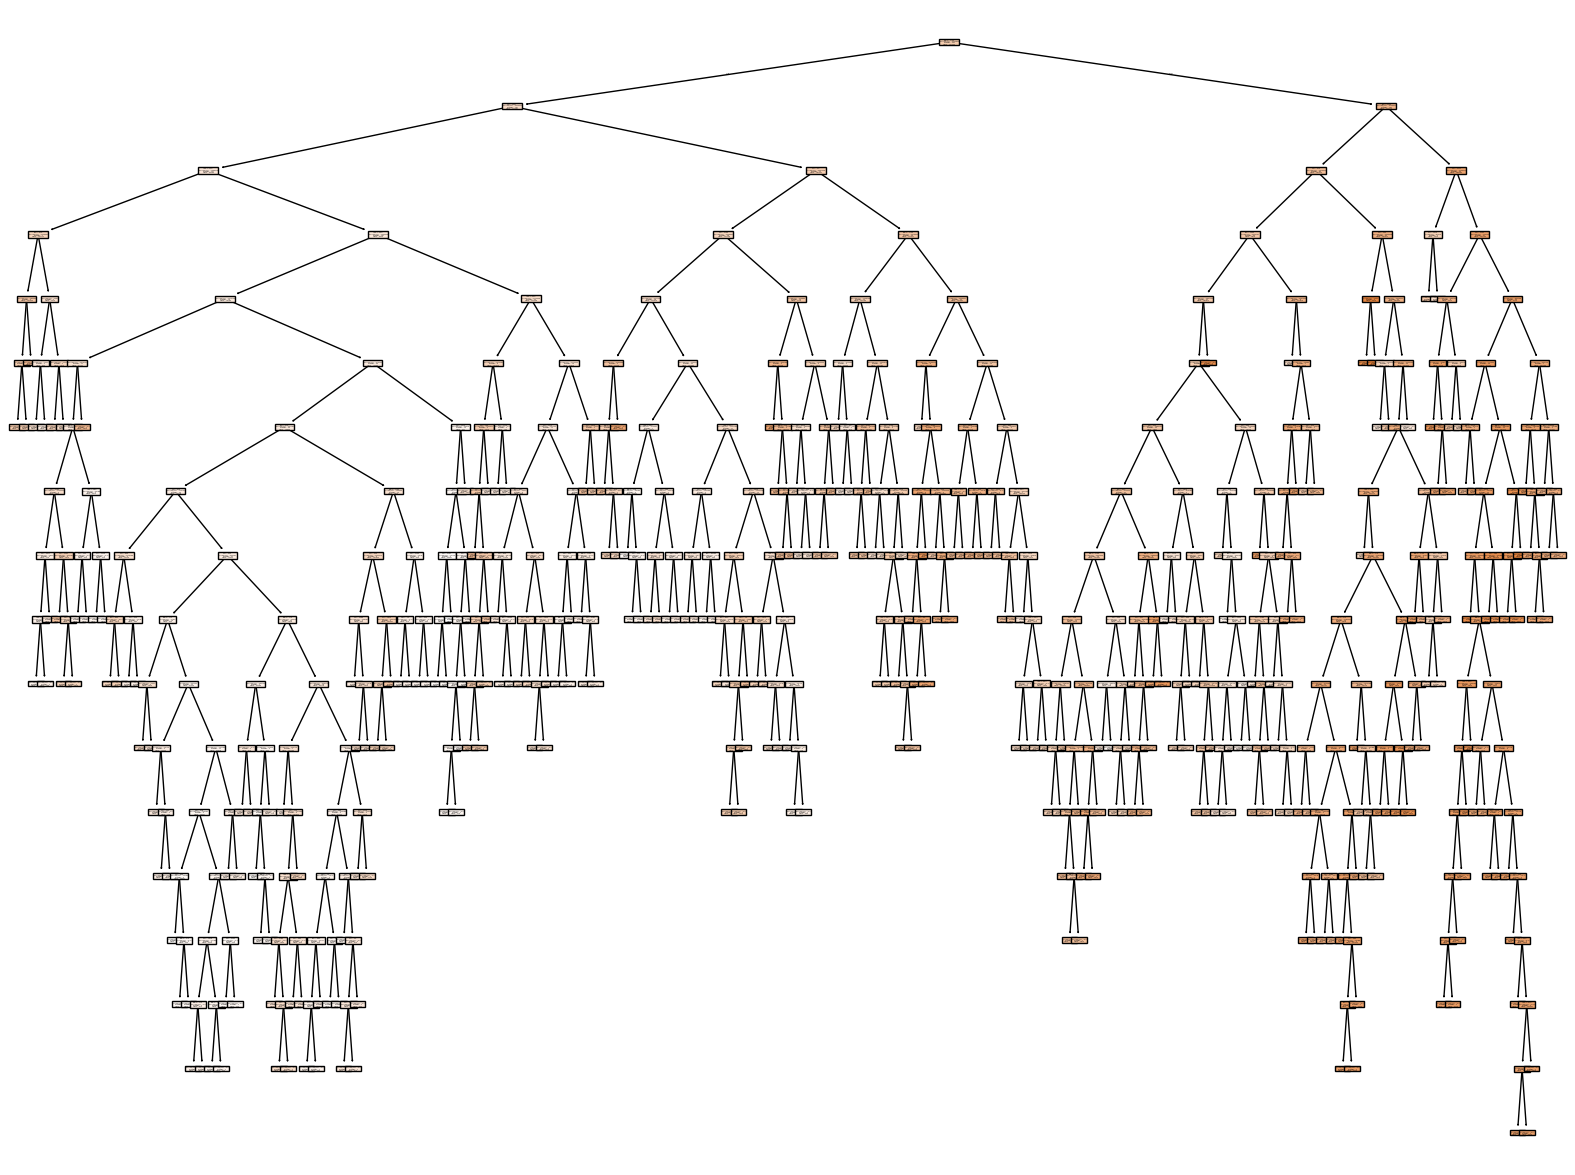

In [33]:
fig = plt.figure()
fig.set_size_inches(20,15)
fig = tree.plot_tree(regressor, filled = True, feature_names = X.columns)
plt.show()

Como não existem classes, a verificação do erro de predições pelo método `score` é dada pelo coeficiente de determinação $R^2$ (https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o, no Python https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.fit). Um coeficiente de 1 para os testes indica um overfitting do modelo.

In [34]:
print("R2 testes : ", regressor.score(x_treino, y_treino))

R2 testes :  1.0


O coeficiente está muito alto (=1), o que pode indicar um overfitting aos dados de treino. Verificando o valor nos dados de teste:

In [35]:
print(regressor.score(x_teste, y_teste))

-0.48828738158797713


Realmente os dados se ajustaram muito bem ao treino porém não conseguem explicar os dados de teste. Criando um pequeno algoritmo para otimizar os parâmetros: usando a validação k-fold com k = 4, vamos alterar os parâmetros `max_depth`, `criterion`, `splitter`, `min_samples_split`.

In [36]:
# Parâmetros variados:
criterio = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
split  = ["best", "random"]
min_samples = range(2,5)
param_otimos = ()

best_s = 0
for i in range(1,20):
    for c in criterio:
        for s in split:
            for m in min_samples:              
                regressor = DecisionTreeRegressor( random_state = 42, max_depth = i, criterion = c, splitter = s, min_samples_split = m) 
                mean_score = cross_val_score(regressor, X, Y, cv = 4).mean()
                if  mean_score > best_s:
                    best_s = mean_score
                    param_otimos = i,c,s,m
                    print("Melhor current score : ", best_s)
                    print("Melhor current param : ", param_otimos)

print("Melhor score : ", best_s)
print("Melhor score : ", param_otimos)

Melhor current score :  0.21894383383110033
Melhor current param :  (1, 'squared_error', 'best', 2)
Melhor current score :  0.3345696710614511
Melhor current param :  (2, 'squared_error', 'best', 2)
Melhor current score :  0.3446130872434291
Melhor current param :  (2, 'poisson', 'best', 2)
Melhor current score :  0.35375360294288943
Melhor current param :  (3, 'poisson', 'best', 2)
Melhor score :  0.35375360294288943
Melhor score :  (3, 'poisson', 'best', 2)


Portanto os melhores parametros são : `max_depth = 3`, `criterion = 'poisson'`, `splitter = 'best'`, `min_samples_split = 2`, com um $R^2$ médio de 0.3537 (o que é ainda muito baixo). Ajustando um novo modelo com esses parâmetros e plotando a arvore:

Erro no teste (k-fold) 0.35375360294288943
Erro no treino 0.14051298340566853


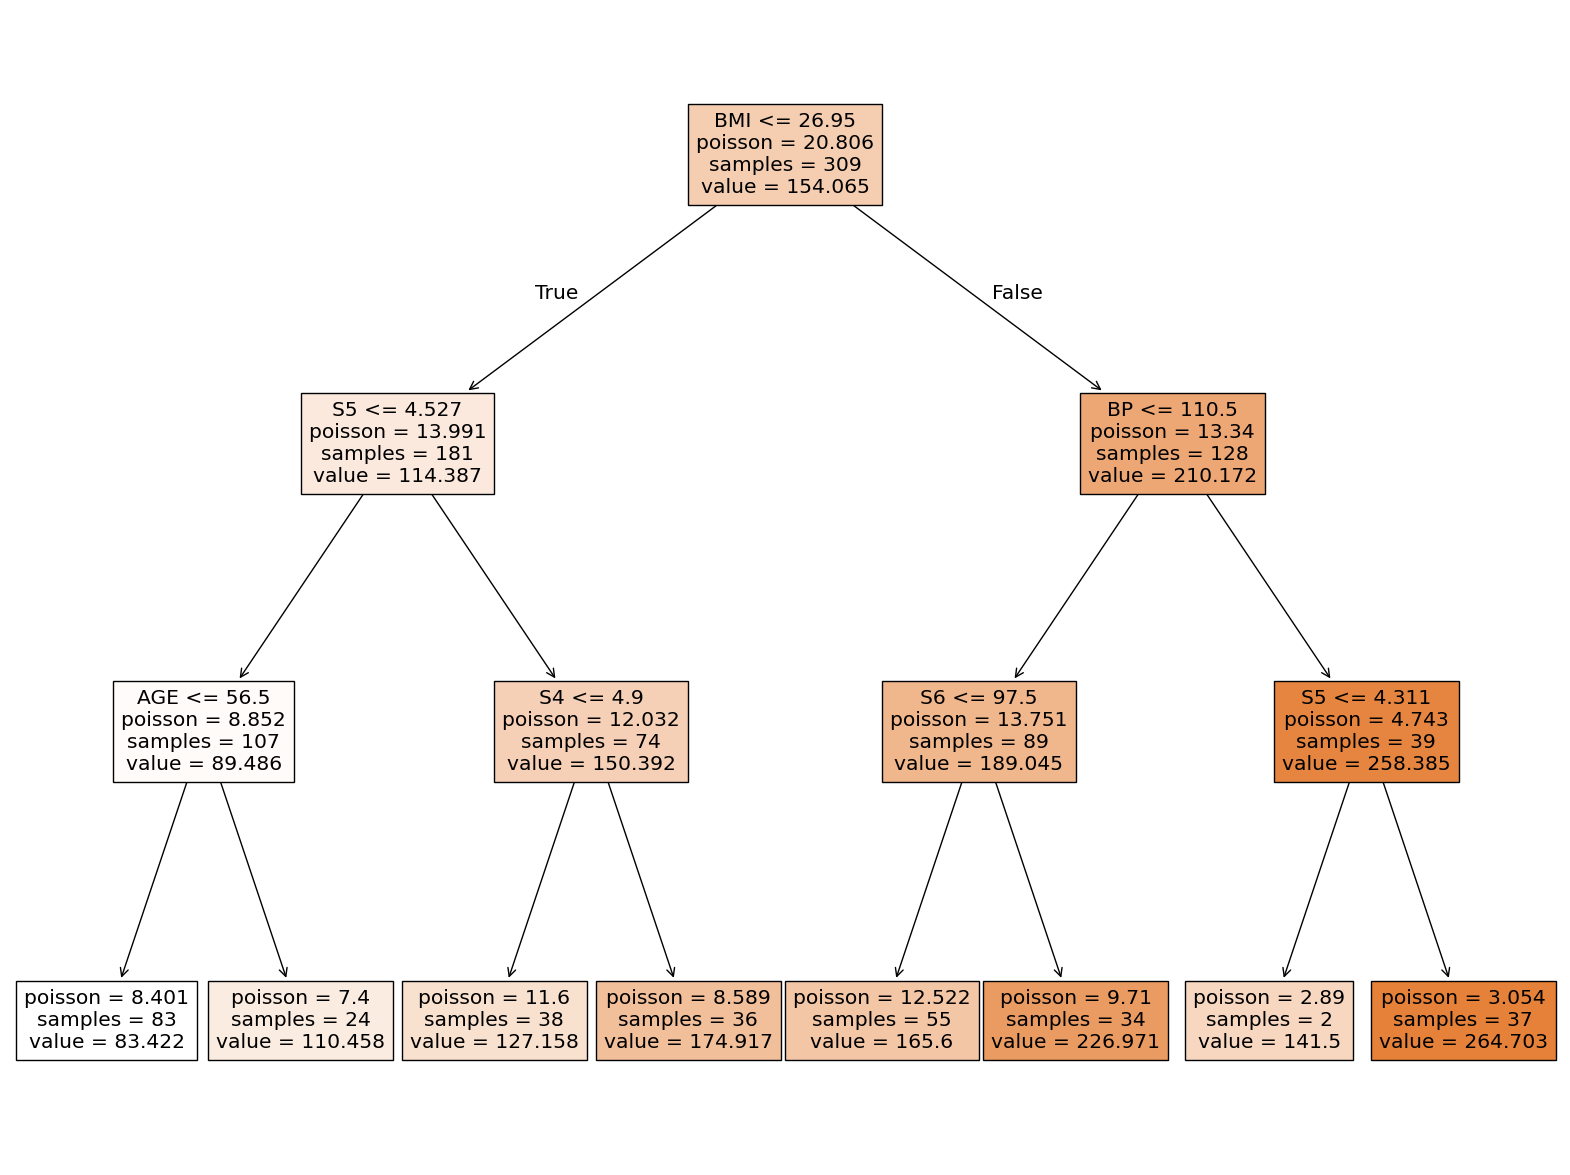

In [37]:
regressor = DecisionTreeRegressor( random_state = 42, max_depth = 3, criterion = 'poisson', splitter = 'best', min_samples_split = 2) 
regressor.fit(x_treino, y_treino)
mean_score = cross_val_score(regressor, X, Y, cv = 4).mean()
print("Erro no teste (k-fold)",mean_score)
print("Erro no treino",regressor.score(x_teste, y_teste))

fig = plt.figure()
fig.set_size_inches(20,15)
fig = tree.plot_tree(regressor, filled = True, feature_names = X.columns)
plt.show()